# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import datetime
import random
import torch
import numpy as np  
import datetime
from collections import deque
#plot
import matplotlib.pyplot as plt
%matplotlib inline


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

## Unity Environment
**********************

In [2]:
env = UnityEnvironment(file_name=".\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        #print("\r States {} \t States-Concate:{} \tAction {}".format(states,states_c, actions))
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))
   
  

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.10000000149011612
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


## Utility Functions - Train| Test | Plot | Zoom | Save Model | Load Model weights
*************

In [26]:
# Deep Determinsitic Policy Gradient Algorithm
# Policy Based -Actor Critic Method
# Function used to train the multi agents for the given environments 
def trainMultiAgents(env,multiAgents,episodes_score,scores_window,avg_score,target_score=0.5,n_episodes=1000):
      
    #Flag to tune Exploration , Learning rate when the agents achieves Rewards greater than 1.0
    isMax1 =0 
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        num_agents=len(env_info.agents) 
      
        #Scores got by each agent in current episode
        agent_scores=np.zeros(num_agents)          
               
        #set initial state
        states = env_info.vector_observations  #Current state 
        rewards = 0
        
        #For each Episode,  take max steps and record the state and reward information until Episode complete   
        while True: # t in range(max_t):
            #Select action based on  policy based
            actions = multiAgents.act(states)
            actions = np.clip(actions, -1, 1)         #all actions between -1 and 1
            #print("\r Main Actions {}- 1:{} , 2:{}".format(actions,np.max(actions[0]), np.max(actions[1])))
            env_info = env.step(actions)[brain_name]  #Perform 'action'
            next_states = env_info.vector_observations #Next env state info 
            rewards = env_info.rewards                #reward +0.1 for every timestep
            dones   = env_info.local_done              #Is Episode complete
            agent_scores += rewards                   #Accumulate Rewards
            states = next_states                        #mark new state as current state
           
            #Save the Experience and Learn what should be the target actions to maximize rewards
            multiAgents.commonMemory.add(states,actions,rewards,next_states,dones)
            if(np.max(agent_scores)>=0.39): 
                replayHighMemoryRewards.add(states,actions,rewards,next_states,dones)
            if  BATCH_SIZE<=len(multiAgents.commonMemory):
                multiAgents.learn()
                
            if np.any(dones):
                break
        #Experience Replay
        #Learning through positive and negative rewards
        if  BATCH_SIZE<=len(multiAgents.commonMemory):
            multiAgents.learn()
        #Scores
        ep_score = np.max(agent_scores)
        episodes_score.append(ep_score)              #Max Score for each episode
        scores_window.append(ep_score)
        avg_score.append(np.mean(scores_window))     #Average Episode score
        
        #Try to adjust HP -Learning rate based on rewards - Exploit vs Exploration
        #Found to be decline once agent reach avg 0.25
        # Once Agent reach 50% goal, (Avg 0.25) try to continue the momentum by reducing the LR further
        if(np.mean(scores_window)>=0.29 and isMax1==0): #tried max(agent_score)> 2.0 and reset on 0.69
            isMax1=1
            setattr(multiAgents,"explorfactor",0.001)
            setattr(multiAgents,"lrActor", 0.000001)
            setattr(multiAgents,"lrCritic",0.000025)
            print("Episode: {} Avg Score {}-so resetting learning rate :1e-10,and explore 0.02".format(i_episode,np.mean(scores_window)))
        #Acheived max score > 1 but when scores down to avg 0.2 reset the params- Increase Lr and explore
        if(np.mean(scores_window)<0.19 and isMax1==1):
            isMax1=0
            setattr(multiAgents,"explorfactor",0.3024)
            setattr(multiAgents,"lrActor",0.0001)
            setattr(multiAgents,"lrCritic",0.00015)
            print("Episode: {} Avg Score getting drop {}-so reset learning rate 1e-3 and explore to 0.024".format(i_episode,np.mean(scores_window)))
            
       
        #Episode scores
        if i_episode % 2 == 0 :#and ep_score >0.0:
            print('\rEpisode: {} Score: {}  AvgScore (100+): {} CurrentWindowMax: {} \n'.format(i_episode,ep_score,np.mean(scores_window),np.max(scores_window)))
        if i_episode % 100 == 0 :#and ep_score >0.0:
            print('\rEpisode :{} score : {} \t Avg Score(100+): {}  WinMax {} \n '.format(i_episode, ep_score,np.mean(scores_window),np.max(scores_window)))
            #print('\r Avg score {} \tMax score so far {} \n'.format(np.mean(avg_score),np.max(episodes_score) ))
            
        
        if np.mean(scores_window) > target_score: 
            print('\rMax Score achieved in episode {} : {} '.format(i_episode,np.mean(scores_window) ) )
            break
    
#Plot Episode score vs avg score
def showGraph(episodes_score,avg_score):
    target_score =0.5
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(episodes_score)), episodes_score)
    plt.plot(np.arange(len(avg_score)), avg_score)
    
    plt.xlabel('Episode number')
    plt.ylabel('Score')
    plt.show()

#Plot graph with target line
def showGraphwithTargetLine(episodes_score,avg_score,target_score=0.5):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(episodes_score)), episodes_score)
    plt.plot(np.arange(len(avg_score)), avg_score)
    plt.plot(np.arange(len(episodes_score)), target_score*np.ones(len(episodes_score)))
    plt.xlabel('Episode number')
    plt.ylabel('Score')

    
"Helps to zoom customized start and end scales to see the plot for specific set"
def zoomPlot(episodes_score,avg_score,zoom_dim,ptStart,ptEnd):
#Zoom above plots to custom range 10K
    target_score =0.5
    if(zoom_dim==(ptEnd-ptStart)):
        zoom_dim = zoom_dim
        zoom_start_point = ptStart
        zoom_end_point = ptEnd
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cus_score=episodes_score[zoom_start_point:zoom_end_point]

        #plt.plot(np.arange(len(scores_window)), scores_window)
        plt.plot(np.arange(zoom_dim), cus_score)
        plt.plot(np.arange(zoom_dim), avg_score[zoom_start_point:zoom_end_point])
        plt.xlabel('Episode number')
        plt.ylabel('Score')

        plt.show()
    else:
        print('scaling not match with start and end point with array dimension')

"Save both trained local and target model weights -Multi agentto Agent "
def save_model_weightsv1(colabAI):
    #Save weights
    [torch.save(actor.state_dict(), 'Checkpoint_actor{}_local.pth'.format(i))for i, actor in enumerate(colabAI.get_actors())]
    [torch.save(critic.state_dict(), 'Checkpoint_critic{}_local.pth'.format(i))for i, critic in enumerate(colabAI.get_critics())]    

"Save both trained local and target model weights -common Actor Network for both agent"
def save_model_weights(colabAI):
    #Save weights
    for agent in colabAI.multiagent:
        torch.save(agent.actor_local.state_dict(),'checkpoint_actor_point_base_9Sep.pth')
        torch.save(agent.critic_local.state_dict(),'checkpoint_critic_point_base_9Sep.pth')
        torch.save(agent.actor_target.state_dict(),'checkpoint_actor_target_base_9Sep.pth')
        torch.save(agent.critic_target.state_dict(),'checkpoint_critic_target_base_9Sep.pth')
       
            

In [7]:
# Deep Determinsitic Policy Gradient Algorithm -Policy Based -Actor Critic Method
# Function used to Test the trained agents for the given environments 
def TestMultiAgents(env,multiAgents,episodes_score,scores_window,avg_score,target_score=0.5,n_episodes=1000):
      
    #Flag to tune Exploration , Learning rate when the agents achieves Rewards greater than 1.0
    isMax1 =0 
    for i_episode in range(1, n_episodes+1):
        #reset the unity Env_info for each new episode
        env_info = env.reset(train_mode=True)[brain_name]
        num_agents=len(env_info.agents) 
        #Scores got by each agent in current episode
        agent_scores=np.zeros(num_agents)          
               
        #set initial state
        states = env_info.vector_observations  #Current state 
        rewards = 0
        
        #multiAgents.resetNoise()

        
        #For each Episode,  take max steps and record the state and reward information until Episode complete   
        while True: # t in range(max_t):
            #Select action based on  policy based
            actions = multiAgents.act(states)
            actions = np.clip(actions, -1, 1)         #all actions between -1 and 1
            #print("\r Main Actions {}- 1:{} , 2:{}".format(actions,np.max(actions[0]), np.max(actions[1])))
            env_info = env.step(actions)[brain_name]  #Perform 'action'
            next_states = env_info.vector_observations #Next env state info 
            rewards = env_info.rewards                #reward +0.1 for every timestep
            dones   = env_info.local_done              #Is Episode complete
            agent_scores += rewards                   #Accumulate Rewards
            states = next_states                        #mark new state as current state
           
            #Save the Experience and Learn what should be the target actions to maximize rewards
            multiAgents.commonMemory.add(states,actions,rewards,next_states,dones)
            if(np.max(agent_scores)>=0.39): 
                replayHighMemoryRewards.add(states,actions,rewards,next_states,dones)
                
            if np.any(dones):
                break
        
        if  BATCH_SIZE<=len(multiAgents.commonMemory):
            multiAgents.learn()
           
        #Scores
        ep_score = np.max(agent_scores)
        episodes_score.append(ep_score)              #Max Score for each episode
        scores_window.append(ep_score)
        avg_score.append(np.mean(scores_window))     #Average Episode score
        
        
        #Episode scores
        if i_episode % 10 == 0 :#nd ep_score >0.0:
            print('\rEpisode: {} Score: {}  AvgScore (100+): {} CurrentWindowMax: {} \n'.format(i_episode,ep_score,np.mean(scores_window),np.max(scores_window)))
        if i_episode % 100 == 0 :#and ep_score >0.0:
            print('\rEpisode :{} score : {} \t Avg Score(100+): {}  WinMax {} \n '.format(i_episode, ep_score,np.mean(scores_window),np.max(scores_window)))
            #print('\r Avg score {} \tMax score so far {} \n'.format(np.mean(avg_score),np.max(episodes_score) ))
            
        
        if np.mean(scores_window) > target_score and i_episode>100: 
            print('\rMax Score achieved in episode {} : {} '.format(i_episode,np.mean(scores_window) ) )
            break

##  Configuration
******************

In [8]:
import json
config = json.load(open('HyperParamsConfig.json'))

SEEDC = config["SEEDC"]
SEED = config["SEED"]
#Replay Memory config
BUFFER_SIZE = config["BUFFER_SIZE"] #deque memory
BATCH_SIZE = config["BATCH_SIZE"]   #samples
# Hyperparameters
GAMMA = config['GAMMA']            # discount factor
TAU = config['TAU']                # for soft update of target parameters
LR_ACTOR = config['LR_ACTOR']      # learning rate of the actor 
LR_CRITIC = config['LR_CRITIC']    # learning rate of the critic
MU= config["MU"]
THETA = config["THETA"]
SIGMA = config["SIGMA"]
EXPLORE = config["EXPLORE"]



## Class & Seed
****

In [9]:
#DeepDeterminsticPolicyGradient -Multi Agent -DDPG
from nn_model import Actor , Critic
from DDPGMultiAgentTennis import DDPGMultiAgent
from agent import ReplayBuffer

#Random Seed-set the seed of the random number generator to a fixed value to get 
#Reproducable results
np.random.seed(SEEDC)
torch.manual_seed(SEEDC) 



## Replay Memory - Save Experience
****

In [10]:
#common Replay Memory for both Agents
replayMemory =  ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,num_agents, SEED)
#common Replay Memory store high rewards
replayHighMemoryRewards =  ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,num_agents, SEED)



## Tennis Agents Initialization
*****

In [11]:
# Create 2 Agents and having Actor Network and Memory common for both but Critic Network for each one
colabAI = DDPGMultiAgent(state_size,action_size,replayMemory,num_agents,config)


OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.09024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.09024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
HP :Gamma :0.998789 , TAU:0.0013, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29, ExploreFactor 0.09024, IsTargetHardcopyFalse


## Trained Agent Intialization
****

In [12]:
#Multi Agents with common Actor and Memory but separate Critic Network- Loaded with  trained weights
colabAI2 = DDPGMultiAgent(state_size,action_size,replayMemory,num_agents,config)
actornnk_path ="./avg1p8Max2p6_100Epi/checkpoint_actor_point_base_9Sep.pth"
criticnn_path ="./avg1p8Max2p6_100Epi/checkpoint_critic_point_base_9Sep.pth"
act_tar_path = "./avg1p8Max2p6_100Epi/checkpoint_actor_target_base_9Sep.pth"
critc_tar_path="./avg1p8Max2p6_100Epi/checkpoint_critic_target_base_9Sep.pth"
colabAI2.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)

OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.09024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.09024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
HP :Gamma :0.998789 , TAU:0.0013, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29, ExploreFactor 0.09024, IsTargetHardcopyFalse
Loading trained models from ./avg1p8Max2p6_100Epi/checkpoint_actor_point_base_9Sep.pth and ./avg1p8Max2p6_100Epi/checkpoint_critic_point_base_9Sep.pth
Done!


## KEY LEARNINGS and Solution Approach 
*******
1. This is the base file used to get max hit of 2.78 with Hyper parameter tuning and exploration in multiple iteration , pls refer History session
2. Tried learn every step vs end of Episodes
3. Tried learn 2 times every step 
4. Tried Learn every timestep for 500 to 1000 then continue train and learn end of episodes
5. Refreshhed Memory with High rewards
6. Tried changing Explore factor form 0.9 to 0..032 - Explore vs exploit
7. Saved each training weights and used to top achived for next iteration
8. Tried both Windows and Udacity workspace 
9. Learning rate and Explore factor are the first 2 params to tune . Initial training , it worked only when i try very small learning rate with explore as 0.7 to 0.9 with sigma around 0.9 but once started learning slighg increase in Learning rate and run time tune while training


In [12]:
#Load trained model weights where got 0.5 in 1800 episodes itself
# Max hit 2.6 and avg 0.3
actornnk_path ="./avgp27Max2p5/checkpoint_actor_point_base_avg2p78.pth"
criticnn_path ="./avgp27Max2p5/checkpoint_critic_point_base_avg2p78.pth"
act_tar_path = "./avgp27Max2p5/checkpoint_actor_target_base_avg2p78.pth"
critc_tar_path="./avgp27Max2p5/checkpoint_critic_target_base_avg2p78.pth"
colabAI.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)



Loading trained models from ./avgp27Max2p5/checkpoint_actor_point_base_avg2p78.pth and ./avgp27Max2p5/checkpoint_critic_point_base_avg2p78.pth
Done!


In [20]:
# History v3:Load trained model weights where got 0.5 in 1800 episodes itself
#tried 1000 Episodes avg 0.07 and max 0.3

actornnk_path ="./avg2Max2p6in100epi/checkpoint_actor_point_base_2p6in100Epi.pth"
criticnn_path ="./avg2Max2p6in100epi/checkpoint_critic_point_base_2p6in100Epi.pth"
act_tar_path = "./avg2Max2p6in100epi/checkpoint_actor_target_base_2p6in100Epi.pth"
critc_tar_path="./avg2Max2p6in100epi/checkpoint_critic_target_base_2p6in100Epi.pth"
colabAI.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)



Loading trained models from ./avg2Max2p6in100epi/checkpoint_actor_point_base_2p6in100Epi.pth and ./avg2Max2p6in100epi/checkpoint_critic_point_base_2p6in100Epi.pth
Done!


## Score Board
****

In [14]:
#counters
agent_scores=np.zeros(num_agents)          # 
episodes_score = []                         #Score counter to store each Episode score
scores_window = deque(maxlen=100)          #Window for every 100 episodes scores to get the Target Avg score
avg_score =[]
states=0

## Trained Multi Agents Play| Max Hit 2.6 | Environment Solved in 155 Episodes !!!
********

In [15]:
TestMultiAgents(env,colabAI2,episodes_score,scores_window,avg_score,n_episodes=500)
save_model_weights(colabAI2)

Episode: 10 Score: 0.6000000089406967  AvgScore (100+): 0.26900000404566526 CurrentWindowMax: 0.6000000089406967 

Episode: 20 Score: 0.10000000149011612  AvgScore (100+): 0.22900000344961882 CurrentWindowMax: 0.6000000089406967 

Episode: 30 Score: 0.10000000149011612  AvgScore (100+): 0.1856666694705685 CurrentWindowMax: 0.6000000089406967 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.1667500025127083 CurrentWindowMax: 0.6000000089406967 

Episode: 50 Score: 0.09000000171363354  AvgScore (100+): 0.1592000024020672 CurrentWindowMax: 0.6000000089406967 

Episode: 60 Score: 0.30000000447034836  AvgScore (100+): 0.16600000249842803 CurrentWindowMax: 0.6000000089406967 

Episode: 70 Score: 0.0  AvgScore (100+): 0.1980000029717173 CurrentWindowMax: 2.600000038743019 

Episode: 80 Score: 0.09000000171363354  AvgScore (100+): 0.24050000361166896 CurrentWindowMax: 2.600000038743019 

Episode: 90 Score: 0.10000000149011612  AvgScore (100+): 0.2258888922838701 CurrentWindowMax: 2

## Rewards Plots 
***

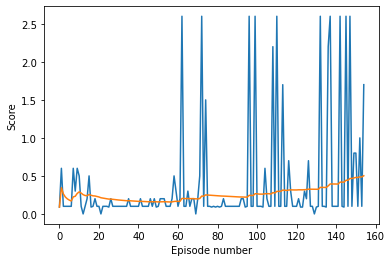

In [16]:
#First 300 run
showGraph(episodes_score,avg_score)


In [17]:
#Just to see how it performs afetr achieved targer
TestMultiAgents(env,colabAI2,episodes_score,scores_window,avg_score,target_score=0.6, n_episodes=500)
#save_model_weights(colabAI2)

Episode: 10 Score: 0.09000000171363354  AvgScore (100+): 0.49690000744536517 CurrentWindowMax: 2.600000038743019 

Episode: 20 Score: 0.10000000149011612  AvgScore (100+): 0.4536000068113208 CurrentWindowMax: 2.600000038743019 

Episode: 30 Score: 2.600000038743019  AvgScore (100+): 0.5306000079587102 CurrentWindowMax: 2.600000038743019 

Episode: 40 Score: 0.09000000171363354  AvgScore (100+): 0.6034000090509654 CurrentWindowMax: 2.600000038743019 

Episode: 50 Score: 0.10000000149011612  AvgScore (100+): 0.587300008814782 CurrentWindowMax: 2.600000038743019 

Episode: 60 Score: 0.5000000074505806  AvgScore (100+): 0.5483000082336367 CurrentWindowMax: 2.600000038743019 

Episode: 70 Score: 0.20000000298023224  AvgScore (100+): 0.5512000082805752 CurrentWindowMax: 2.600000038743019 

Episode: 80 Score: 0.09000000171363354  AvgScore (100+): 0.5430000081658364 CurrentWindowMax: 2.600000038743019 

Episode: 90 Score: 0.30000000447034836  AvgScore (100+): 0.4958000074699521 CurrentWindowMa

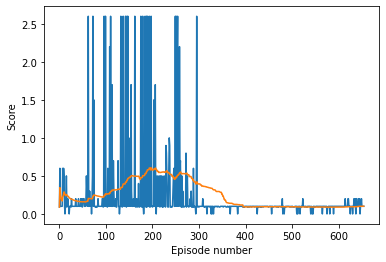

In [18]:
#Scores Rewards plots for 600 episodes
showGraph(episodes_score,avg_score)


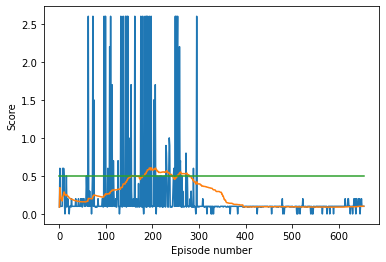

In [27]:
showGraphwithTargetLine(episodes_score,avg_score)

## Last Hyper Parameters Values 
***

In [28]:

for agent in colabAI2.multiagent:
    print("Gamma:{} , exploreFactor:{},LrAct :{},LrCritic:{},Tau:{},Sigma:{},Theta:{}".format(getattr(agent,"gamma"),getattr(agent,"explorfactor"),getattr(agent,"lrActor"),getattr(agent,"lrCritic"),getattr(agent,"tau"),getattr(agent,"sigma"),getattr(agent,"theta")))  

Gamma:0.998789 , exploreFactor:0.09024,LrAct :0.0001,LrCritic:0.00025,Tau:0.0013,Sigma:0.29,Theta:0.193
Gamma:0.998789 , exploreFactor:0.09024,LrAct :0.0001,LrCritic:0.00025,Tau:0.0013,Sigma:0.29,Theta:0.193


# HISTORY - PRINCIPLES OF Reinforcement Learning - Learning from Failures and Rewards!
*****

Just have it all my trails and errors for the path it come across to solve the environment in just 155 Episodes

## First Hit on Target !
***

In [23]:
TestMultiAgents(env,colabAI2,episodes_score,scores_window,avg_score,target_score=0.6,n_episodes=5000)


0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 2590 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 2600 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode :2600 score : 0.0 	 Avg Score(100+): 0.0  WinMax 0.0 
 
Episode: 2610 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2620 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2630 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2640 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2650 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2660 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2670 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2680 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2690 Score: 0.0  AvgScore (100+): 0.0 CurrentWindowMax: 0.0 

Episode: 2700 Score: 0.0  AvgScore (100+): 0.0 CurrentWindo

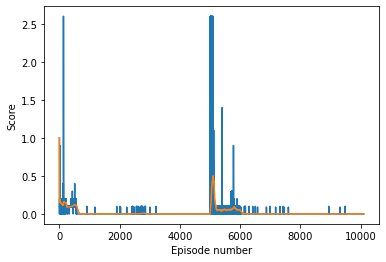

In [24]:
showGraph(episodes_score,avg_score)

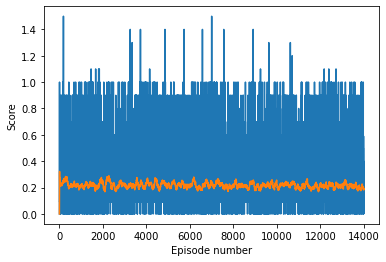

In [28]:
# Trial run - Calling learning only end of each episodes so ran to see the performance till 14K episodes
showGraph(episodes_score,avg_score)


In [14]:
#tune 2 after 5k episodes
for agent in colabAI.multiagent:
    print("Gamma:{} , exploreFactor:{},LrAct :{},LrCritic:{},Tau:{},Sigma:{},Theta:{}".format(getattr(agent,"gamma"),getattr(agent,"explorfactor"),getattr(agent,"lrActor"),getattr(agent,"lrCritic"),getattr(agent,"tau"),getattr(agent,"sigma"),getattr(agent,"theta")))  

Gamma:0.998789 , exploreFactor:0.0024,LrAct :1e-07,LrCritic:2.5e-06,Tau:0.0013,Sigma:0.29,Theta:0.193
Gamma:0.998789 , exploreFactor:0.0024,LrAct :1e-07,LrCritic:2.5e-06,Tau:0.0013,Sigma:0.29,Theta:0.193


## REPEAT ONCE -  Trail runs
****


In [28]:
import json
config = json.load(open('HyperParamsConfig.json'))

SEEDC = config["SEEDC"]
SEED = config["SEED"]
#Replay Memory config
BUFFER_SIZE = config["BUFFER_SIZE"] #deque memory
BATCH_SIZE = config["BATCH_SIZE"]   #samples
# Hyperparameters
GAMMA = config['GAMMA']            # discount factor
TAU = config['TAU']                # for soft update of target parameters
LR_ACTOR = config['LR_ACTOR']      # learning rate of the actor 
LR_CRITIC = config['LR_CRITIC']    # learning rate of the critic
MU= config["MU"]
THETA = config["THETA"]
SIGMA = config["SIGMA"]
EXPLORE = config["EXPLORE"]



In [29]:
#common Replay Memory for both Agents
replayMemory =  ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,num_agents, SEED)
#common Replay Memory store high rewards
replayHighMemoryRewards =  ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,num_agents, SEED)
colabAI2 = DDPGMultiAgent(state_size,action_size,replayMemory,num_agents,config)
actornnk_path ="./avg1p8Max2p6_100Epi/checkpoint_actor_point_base_9Sep.pth"
criticnn_path ="./avg1p8Max2p6_100Epi/checkpoint_critic_point_base_9Sep.pth"
act_tar_path = "./avg1p8Max2p6_100Epi/checkpoint_actor_target_base_9Sep.pth"
critc_tar_path="./avg1p8Max2p6_100Epi/checkpoint_critic_target_base_9Sep.pth"
colabAI2.load_trained_model(actornnk_path,criticnn_path,act_tar_path,critc_tar_path)


OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.09024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
Agent's HP :Seed 1,Gamma :0.998789, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29,TAU:0.0013, ExploreFactor 0.09024, IsTargetHardcopyTrue
OUNoise params - Mu:[0. 0.] , theta:0.193 sigma:0.29 
HP :Gamma :0.998789 , TAU:0.0013, LR_Act :0.0001 , LR_Critic 0.00025 , Mu 0, Theta 0.193, Sigma 0.29, ExploreFactor 0.09024, IsTargetHardcopyFalse
Loading trained models from ./avg1p8Max2p6_100Epi/checkpoint_actor_point_base_9Sep.pth and ./avg1p8Max2p6_100Epi/checkpoint_critic_point_base_9Sep.pth
Done!


In [19]:

for agent in colabAI2.multiagent:
    print("Gamma:{} , exploreFactor:{},LrAct :{},LrCritic:{},Tau:{},Sigma:{},Theta:{}".format(getattr(agent,"gamma"),getattr(agent,"explorfactor"),getattr(agent,"lrActor"),getattr(agent,"lrCritic"),getattr(agent,"tau"),getattr(agent,"sigma"),getattr(agent,"theta")))  

Gamma:0.998789 , exploreFactor:0.09024,LrAct :0.0001,LrCritic:0.00025,Tau:0.0013,Sigma:0.29,Theta:0.193
Gamma:0.998789 , exploreFactor:0.09024,LrAct :0.0001,LrCritic:0.00025,Tau:0.0013,Sigma:0.29,Theta:0.193


In [30]:
#counters
agent_scores=np.zeros(num_agents)          # 
episodes_score = []                         #Score counter to store each Episode score
scores_window = deque(maxlen=100)          #Window for every 100 episodes scores to get the Target Avg score
avg_score =[]
states=0

In [31]:
#Test trained Tennis Agents
#Gamma:0.998789 , exploreFactor:0.09024,LrAct :0.0001,LrCritic:0.00025,Tau:0.0013,Sigma:0.29,Theta:0.193
#Fresh start 
TestMultiAgents(env,colabAI2,episodes_score,scores_window,avg_score,target_score=0.51, n_episodes=500)
save_model_weights(colabAI2)


Episode: 10 Score: 0.09000000171363354  AvgScore (100+): 0.379000005684793 CurrentWindowMax: 0.800000011920929 

Episode: 20 Score: 0.5000000074505806  AvgScore (100+): 0.37850000569596887 CurrentWindowMax: 1.0000000149011612 

Episode: 30 Score: 0.09000000171363354  AvgScore (100+): 0.37800000570714476 CurrentWindowMax: 2.0000000298023224 

Episode: 40 Score: 0.09000000171363354  AvgScore (100+): 0.3555000053718686 CurrentWindowMax: 2.0000000298023224 

Episode: 50 Score: 0.09000000171363354  AvgScore (100+): 0.3120000047236681 CurrentWindowMax: 2.0000000298023224 

Episode: 60 Score: 0.10000000149011612  AvgScore (100+): 0.28166667092591524 CurrentWindowMax: 2.0000000298023224 

Episode: 70 Score: 0.10000000149011612  AvgScore (100+): 0.2555714324382799 CurrentWindowMax: 2.0000000298023224 

Episode: 80 Score: 0.10000000149011612  AvgScore (100+): 0.23337500353809446 CurrentWindowMax: 2.0000000298023224 

Episode: 90 Score: 0.10000000149011612  AvgScore (100+): 0.21822222554021412 Cu

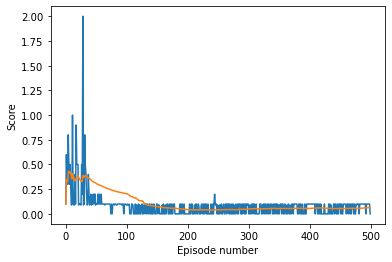

In [32]:
showGraph(episodes_score,avg_score)

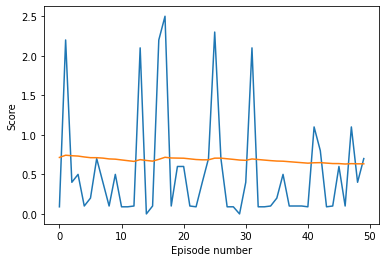

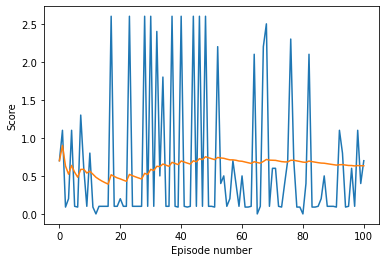

In [25]:
zoomPlot(episodes_score,avg_score,50,51,101)
showGraph(episodes_score,avg_score)

In [26]:
#Test trained Tennis Agents
#Gamma:0.998789 , exploreFactor:0.09024,LrAct :0.0001,LrCritic:0.00025,Tau:0.0013,Sigma:0.29,Theta:0.193
#Fresh start 
TestMultiAgents(env,colabAI2,episodes_score,scores_window,avg_score,target_score=0.51, n_episodes=500)
#save_model_weights(colabAI2)


Episode: 10 Score: 0.10000000149011612  AvgScore (100+): 0.6135000091977417 CurrentWindowMax: 2.600000038743019 

Episode: 20 Score: 0.4000000059604645  AvgScore (100+): 0.613400009199977 CurrentWindowMax: 2.600000038743019 

Episode: 30 Score: 0.7000000104308128  AvgScore (100+): 0.5463000082038343 CurrentWindowMax: 2.600000038743019 

Episode: 40 Score: 0.0  AvgScore (100+): 0.46310000697150827 CurrentWindowMax: 2.600000038743019 

Episode: 50 Score: 0.30000000447034836  AvgScore (100+): 0.40790000615641475 CurrentWindowMax: 2.500000037252903 

Episode: 60 Score: 0.20000000298023224  AvgScore (100+): 0.3797000057436526 CurrentWindowMax: 2.500000037252903 

Episode: 70 Score: 0.5000000074505806  AvgScore (100+): 0.35080000530928374 CurrentWindowMax: 2.3000000342726707 

Episode: 80 Score: 0.09000000171363354  AvgScore (100+): 0.32880000498145817 CurrentWindowMax: 2.2000000327825546 

Episode: 90 Score: 0.800000011920929  AvgScore (100+): 0.3207000048644841 CurrentWindowMax: 2.20000003

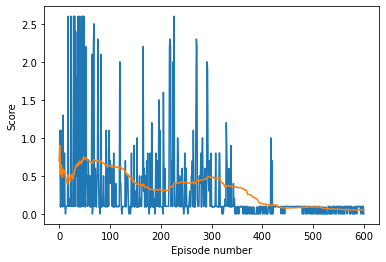

In [27]:
#zoomPlot(episodes_score,avg_score,100,1,101)
showGraph(episodes_score,avg_score)

011612  AvgScore (100+): 0.12840000193566084 CurrentWindowMax: 0.20000000298023224 

Episode: 370 Score: 0.10000000149011612  AvgScore (100+): 0.128300001937896 CurrentWindowMax: 0.20000000298023224 

Episode: 372 Score: 0.10000000149011612  AvgScore (100+): 0.12930000195279717 CurrentWindowMax: 0.20000000298023224 

Episode: 374 Score: 0.10000000149011612  AvgScore (100+): 0.12930000195279717 CurrentWindowMax: 0.20000000298023224 

Episode: 376 Score: 0.10000000149011612  AvgScore (100+): 0.12930000195279717 CurrentWindowMax: 0.20000000298023224 

Episode: 378 Score: 0.20000000298023224  AvgScore (100+): 0.13030000196769834 CurrentWindowMax: 0.20000000298023224 

Episode: 380 Score: 0.10000000149011612  AvgScore (100+): 0.1313000019825995 CurrentWindowMax: 0.20000000298023224 

Episode: 382 Score: 0.20000000298023224  AvgScore (100+): 0.1313000019825995 CurrentWindowMax: 0.20000000298023224 

Episode: 384 Score: 0.10000000149011612  AvgScore (100+): 0.1313000019825995 CurrentWindowMax

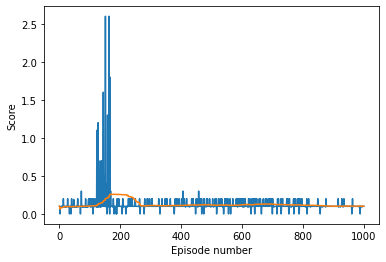

In [17]:
#
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=700)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

In [18]:
#200 Episodes - max 2.6 and avg 0.26 down to .20  - 
for agent in colabAI.multiagent:
    setattr(agent,"lrActor",0.00001)
    setattr(agent,"lrCritic",0.00002)
    setattr(agent,"explorfactor",0.2024)
    



Episode: 2 Score: 0.09000000171363354  AvgScore (100+): 0.20390000315383078 CurrentWindowMax: 2.0000000298023224 

Episode: 4 Score: 0.09000000171363354  AvgScore (100+): 0.18480000287294387 CurrentWindowMax: 2.0000000298023224 

Episode: 6 Score: 0.10000000149011612  AvgScore (100+): 0.18280000284314155 CurrentWindowMax: 2.0000000298023224 

Episode: 8 Score: 0.10000000149011612  AvgScore (100+): 0.18390000285580754 CurrentWindowMax: 2.0000000298023224 

Episode: 10 Score: 1.1000000163912773  AvgScore (100+): 0.18890000293031334 CurrentWindowMax: 2.0000000298023224 

Episode: 12 Score: 0.10000000149011612  AvgScore (100+): 0.18700000289827584 CurrentWindowMax: 2.0000000298023224 

Episode: 14 Score: 0.10000000149011612  AvgScore (100+): 0.1860000028833747 CurrentWindowMax: 2.0000000298023224 

Episode: 16 Score: 0.10000000149011612  AvgScore (100+): 0.18200000282377005 CurrentWindowMax: 2.0000000298023224 

Episode: 18 Score: 0.09000000171363354  AvgScore (100+): 0.18080000281333924 C

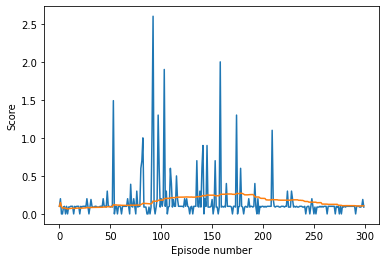

In [19]:
#
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=100)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

In [20]:
#Reset to 
for agent in colabAI.multiagent:
    setattr(agent,"lrActor",0.00001)
    setattr(agent,"lrCritic",0.00025)
    setattr(agent,"explorfactor",0.3024)  


Episode: 2 Score: 0.09000000171363354  AvgScore (100+): 0.10610000168904662 CurrentWindowMax: 1.1000000163912773 

Episode: 4 Score: 0.09000000171363354  AvgScore (100+): 0.10610000168904662 CurrentWindowMax: 1.1000000163912773 

Episode: 6 Score: 0.10000000149011612  AvgScore (100+): 0.10610000168904662 CurrentWindowMax: 1.1000000163912773 

Episode: 8 Score: 0.10000000149011612  AvgScore (100+): 0.10710000170394779 CurrentWindowMax: 1.1000000163912773 

Episode: 10 Score: 0.0  AvgScore (100+): 0.09600000154227019 CurrentWindowMax: 0.30000000447034836 

Episode: 12 Score: 0.20000000298023224  AvgScore (100+): 0.09600000154227019 CurrentWindowMax: 0.30000000447034836 

Episode: 14 Score: 0.10000000149011612  AvgScore (100+): 0.09600000154227019 CurrentWindowMax: 0.30000000447034836 

Episode: 16 Score: 0.10000000149011612  AvgScore (100+): 0.09600000154227019 CurrentWindowMax: 0.30000000447034836 

Episode: 18 Score: 0.10000000149011612  AvgScore (100+): 0.09520000152289868 CurrentWind

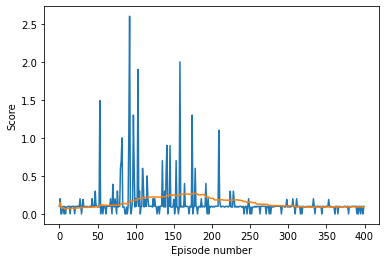

In [21]:
#
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=100)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

In [22]:
#Starting 401 Episode 
#Reset to 
for agent in colabAI.multiagent:
    setattr(agent,"lrActor",0.00001)
    setattr(agent,"lrCritic",0.00025)
    setattr(agent,"explorfactor",0.001)  


0298023224 

Episode: 168 Score: 0.20000000298023224  AvgScore (100+): 0.09510000156238675 CurrentWindowMax: 0.20000000298023224 

Episode: 170 Score: 0.10000000149011612  AvgScore (100+): 0.09510000156238675 CurrentWindowMax: 0.20000000298023224 

Episode: 172 Score: 0.09000000171363354  AvgScore (100+): 0.09400000154972077 CurrentWindowMax: 0.20000000298023224 

Episode: 174 Score: 0.09000000171363354  AvgScore (100+): 0.0949000015668571 CurrentWindowMax: 0.20000000298023224 

Episode: 176 Score: 0.09000000171363354  AvgScore (100+): 0.0949000015668571 CurrentWindowMax: 0.20000000298023224 

Episode: 178 Score: 0.10000000149011612  AvgScore (100+): 0.09500000156462192 CurrentWindowMax: 0.20000000298023224 

Episode: 180 Score: 0.10000000149011612  AvgScore (100+): 0.09410000154748559 CurrentWindowMax: 0.20000000298023224 

Episode: 182 Score: 0.10000000149011612  AvgScore (100+): 0.09420000154525042 CurrentWindowMax: 0.20000000298023224 

Episode: 184 Score: 0.10000000149011612  AvgS

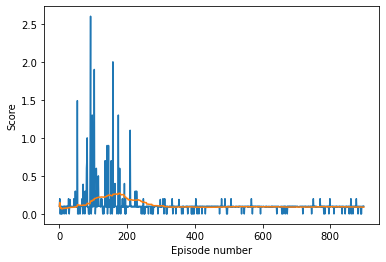

In [23]:
#
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=500)
save_model_weights(colabAI)#save file renamed to base1.pth just preserve prv weights
showGraph(episodes_score,avg_score)

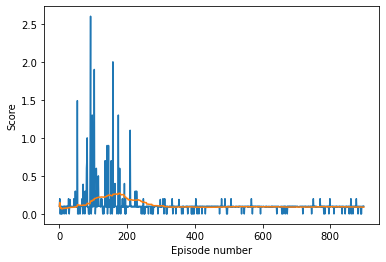

In [24]:
showGraph(episodes_score,avg_score)

In [25]:
#Starting 401 Episode 
#Reset to 
for agent in colabAI.multiagent:
    setattr(agent,"explorfactor",0.17)  


In [26]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=500)
save_model_weights(colabAI)

0.09430000154301524 CurrentWindowMax: 0.20000000298023224 

Episode: 168 Score: 0.0  AvgScore (100+): 0.09330000152811407 CurrentWindowMax: 0.20000000298023224 

Episode: 170 Score: 0.10000000149011612  AvgScore (100+): 0.09430000154301524 CurrentWindowMax: 0.20000000298023224 

Episode: 172 Score: 0.09000000171363354  AvgScore (100+): 0.09420000154525042 CurrentWindowMax: 0.20000000298023224 

Episode: 174 Score: 0.10000000149011612  AvgScore (100+): 0.09430000154301524 CurrentWindowMax: 0.20000000298023224 

Episode: 176 Score: 0.09000000171363354  AvgScore (100+): 0.09440000154078007 CurrentWindowMax: 0.20000000298023224 

Episode: 178 Score: 0.09000000171363354  AvgScore (100+): 0.09430000154301524 CurrentWindowMax: 0.20000000298023224 

Episode: 180 Score: 0.10000000149011612  AvgScore (100+): 0.09430000154301524 CurrentWindowMax: 0.20000000298023224 

Episode: 182 Score: 0.20000000298023224  AvgScore (100+): 0.0953000015579164 CurrentWindowMax: 0.20000000298023224 

Episode: 184 

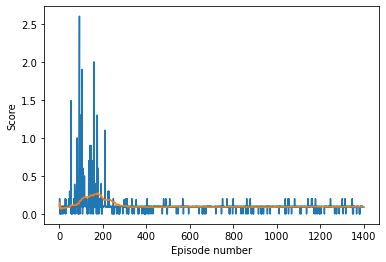

In [27]:
showGraph(episodes_score,avg_score)

.10040000155568123 CurrentWindowMax: 0.4000000059604645 

Episode: 654 Score: 0.0  AvgScore (100+): 0.09550000147894025 CurrentWindowMax: 0.4000000059604645 

Episode: 656 Score: 0.0  AvgScore (100+): 0.09550000147894025 CurrentWindowMax: 0.4000000059604645 

Episode: 658 Score: 0.0  AvgScore (100+): 0.09550000147894025 CurrentWindowMax: 0.4000000059604645 

Episode: 660 Score: 0.0  AvgScore (100+): 0.09050000140443444 CurrentWindowMax: 0.4000000059604645 

Episode: 662 Score: 0.4000000059604645  AvgScore (100+): 0.09350000144913792 CurrentWindowMax: 0.4000000059604645 

Episode: 664 Score: 0.20000000298023224  AvgScore (100+): 0.09360000144690275 CurrentWindowMax: 0.4000000059604645 

Episode: 666 Score: 0.0  AvgScore (100+): 0.09360000144690275 CurrentWindowMax: 0.4000000059604645 

Episode: 668 Score: 0.0  AvgScore (100+): 0.09270000142976642 CurrentWindowMax: 0.4000000059604645 

Episode: 670 Score: 0.10000000149011612  AvgScore (100+): 0.09260000143200159 CurrentWindowMax: 0.40000

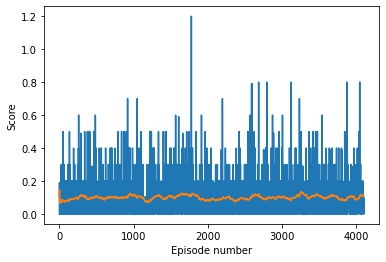

In [35]:
#Training Tennis Agents
#G
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
showGraph(episodes_score,avg_score)
save_model_weights(colabAI)


In [36]:
for agent in colabAI.multiagent:
    setattr(agent,"lrActor",0.00005)
    setattr(agent,"lrCritic",0.00001)
    

In [40]:

trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
#save_model_weights(colabAI)


e: 0.09000000171363354  AvgScore (100+): 0.09780000153928996 CurrentWindowMax: 0.490000007674098 

Episode: 658 Score: 0.09000000171363354  AvgScore (100+): 0.09670000152662396 CurrentWindowMax: 0.490000007674098 

Episode: 660 Score: 0.10000000149011612  AvgScore (100+): 0.09680000152438879 CurrentWindowMax: 0.490000007674098 

Episode: 662 Score: 0.0  AvgScore (100+): 0.09500000149011611 CurrentWindowMax: 0.490000007674098 

Episode: 664 Score: 0.10000000149011612  AvgScore (100+): 0.09600000150501728 CurrentWindowMax: 0.490000007674098 

Episode: 666 Score: 0.0  AvgScore (100+): 0.09500000149011611 CurrentWindowMax: 0.490000007674098 

Episode: 668 Score: 0.09000000171363354  AvgScore (100+): 0.09500000149011611 CurrentWindowMax: 0.490000007674098 

Episode: 670 Score: 0.10000000149011612  AvgScore (100+): 0.09100000143051147 CurrentWindowMax: 0.490000007674098 

Episode: 672 Score: 0.09000000171363354  AvgScore (100+): 0.08590000135824084 CurrentWindowMax: 0.4000000059604645 

Epis

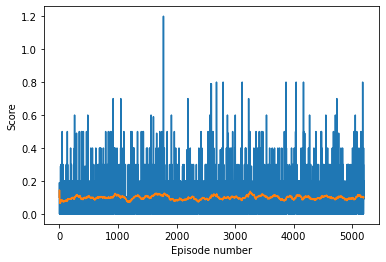

In [41]:
showGraph(episodes_score,avg_score)

In [ ]:
save_model_weights(colabAI)

Episode: 10 Score: 0.10000000149011612  AvgScore (100+): 0.11440000180155038 CurrentWindowMax: 0.20000000298023224 

Episode: 20 Score: 0.09000000171363354  AvgScore (100+): 0.11430000180378556 CurrentWindowMax: 0.20000000298023224 

Episode: 30 Score: 0.10000000149011612  AvgScore (100+): 0.11450000179931522 CurrentWindowMax: 0.20000000298023224 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.11430000180378556 CurrentWindowMax: 0.20000000298023224 

Episode: 50 Score: 0.09000000171363354  AvgScore (100+): 0.11910000188276172 CurrentWindowMax: 0.20000000298023224 

Episode: 60 Score: 0.20000000298023224  AvgScore (100+): 0.11710000185295939 CurrentWindowMax: 0.20000000298023224 

Episode: 70 Score: 0.10000000149011612  AvgScore (100+): 0.11830000186339021 CurrentWindowMax: 0.20000000298023224 

Episode: 80 Score: 0.09000000171363354  AvgScore (100+): 0.11850000185891986 CurrentWindowMax: 0.20000000298023224 

Episode: 90 Score: 0.19000000320374966  AvgScore (100+): 0.11870

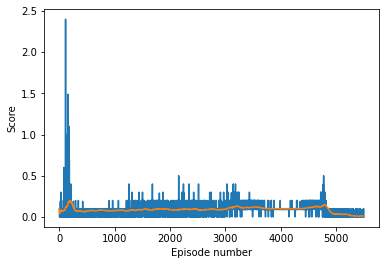

In [23]:
#Training Tennis Agents
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

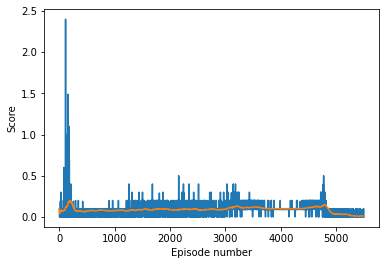

In [24]:
showGraph(episodes_score,avg_score)

In [25]:
#Training Tennis Agents
#Gamma:0.998789 , exploreFactor:0.5024,LrAct :1e-07,LrCritic:2.5e-06,Tau:0.0013,Sigma:0.29,Theta:0.193
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)

save_model_weights(colabAI)


Episode: 10 Score: 0.0  AvgScore (100+): 0.010200000181794167 CurrentWindowMax: 0.10000000149011612 

Episode: 20 Score: 0.09000000171363354  AvgScore (100+): 0.012100000213831664 CurrentWindowMax: 0.10000000149011612 

Episode: 30 Score: 0.0  AvgScore (100+): 0.011100000198930503 CurrentWindowMax: 0.10000000149011612 

Episode: 40 Score: 0.0  AvgScore (100+): 0.008400000147521496 CurrentWindowMax: 0.10000000149011612 

Episode: 50 Score: 0.0  AvgScore (100+): 0.006600000113248825 CurrentWindowMax: 0.10000000149011612 

Episode: 60 Score: 0.09000000171363354  AvgScore (100+): 0.009500000160187483 CurrentWindowMax: 0.10000000149011612 

Episode: 70 Score: 0.0  AvgScore (100+): 0.010500000175088644 CurrentWindowMax: 0.10000000149011612 

Episode: 80 Score: 0.0  AvgScore (100+): 0.01140000019222498 CurrentWindowMax: 0.10000000149011612 

Episode: 90 Score: 0.0  AvgScore (100+): 0.011500000189989805 CurrentWindowMax: 0.10000000149011612 

Episode: 100 Score: 0.0  AvgScore (100+): 0.0115000

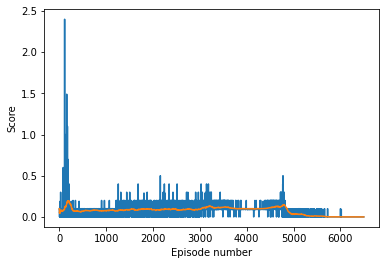

In [26]:
showGraph(episodes_score,avg_score)

In [26]:
save_model_weights(colabAI)

Episode: 10 Score: 0.0  AvgScore (100+): 0.07390000117942691 CurrentWindowMax: 0.20000000298023224 

Episode: 20 Score: 0.0  AvgScore (100+): 0.07180000115185976 CurrentWindowMax: 0.20000000298023224 

Episode: 30 Score: 0.09000000171363354  AvgScore (100+): 0.07370000118389726 CurrentWindowMax: 0.20000000298023224 

Episode: 40 Score: 0.0  AvgScore (100+): 0.07450000120326877 CurrentWindowMax: 0.20000000298023224 

Episode: 50 Score: 0.10000000149011612  AvgScore (100+): 0.07370000118389726 CurrentWindowMax: 0.10000000149011612 

Episode: 60 Score: 0.0  AvgScore (100+): 0.07180000115185976 CurrentWindowMax: 0.10000000149011612 

Episode: 70 Score: 0.10000000149011612  AvgScore (100+): 0.07170000115409493 CurrentWindowMax: 0.10000000149011612 

Episode: 80 Score: 0.10000000149011612  AvgScore (100+): 0.06780000109225512 CurrentWindowMax: 0.10000000149011612 

Episode: 90 Score: 0.09000000171363354  AvgScore (100+): 0.06780000109225512 CurrentWindowMax: 0.10000000149011612 

Episode: 10

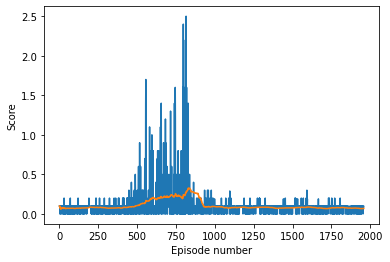

In [30]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=100)
showGraph(episodes_score,avg_score)
save_model_weights(colabAI)


0.20000000298023224 

Episode: 1420 Score: 0.10000000149011612  AvgScore (100+): 0.07850000120699406 CurrentWindowMax: 0.2900000046938658 

Episode: 1430 Score: 0.0  AvgScore (100+): 0.07570000113919377 CurrentWindowMax: 0.2900000046938658 

Episode: 1440 Score: 0.10000000149011612  AvgScore (100+): 0.07370000110939146 CurrentWindowMax: 0.2900000046938658 

Episode: 1450 Score: 0.20000000298023224  AvgScore (100+): 0.0796000012010336 CurrentWindowMax: 0.2900000046938658 

Episode: 1460 Score: 0.0  AvgScore (100+): 0.08550000129267574 CurrentWindowMax: 0.4000000059604645 

Episode: 1470 Score: 0.10000000149011612  AvgScore (100+): 0.08750000132247805 CurrentWindowMax: 0.4000000059604645 

Episode: 1480 Score: 0.10000000149011612  AvgScore (100+): 0.09040000136941671 CurrentWindowMax: 0.4000000059604645 

Episode: 1490 Score: 0.10000000149011612  AvgScore (100+): 0.09240000139921904 CurrentWindowMax: 0.4000000059604645 

Episode: 1500 Score: 0.0  AvgScore (100+): 0.09340000141412019 Curr

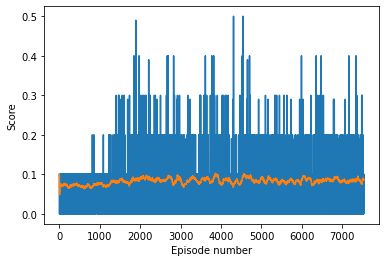

In [31]:
#Call Learn at end of episode
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=3000)
showGraph(episodes_score,avg_score)
save_model_weights(colabAI)

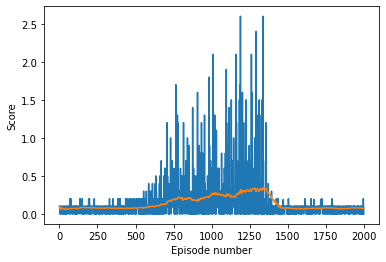

In [16]:

showGraph(episodes_score,avg_score)

In [17]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
showGraph(episodes_score,avg_score)

Episode: 10 Score: 0.0  AvgScore (100+): 0.06990000111982227 CurrentWindowMax: 0.20000000298023224 

Episode: 20 Score: 0.10000000149011612  AvgScore (100+): 0.06720000106841326 CurrentWindowMax: 0.20000000298023224 

Episode: 30 Score: 0.10000000149011612  AvgScore (100+): 0.06630000105127692 CurrentWindowMax: 0.20000000298023224 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.06830000108107924 CurrentWindowMax: 0.20000000298023224 

Episode: 50 Score: 0.10000000149011612  AvgScore (100+): 0.06760000105947256 CurrentWindowMax: 0.20000000298023224 

Episode: 60 Score: 0.0  AvgScore (100+): 0.06870000107213854 CurrentWindowMax: 0.20000000298023224 

Episode: 70 Score: 0.10000000149011612  AvgScore (100+): 0.06780000105500221 CurrentWindowMax: 0.20000000298023224 

Episode: 80 Score: 0.0  AvgScore (100+): 0.06780000105500221 CurrentWindowMax: 0.20000000298023224 

Episode: 90 Score: 0.10000000149011612  AvgScore (100+): 0.07080000109970569 CurrentWindowMax: 0.200000002980232

KeyboardInterrupt: 

In [ ]:
save_model_weights(colabAI)

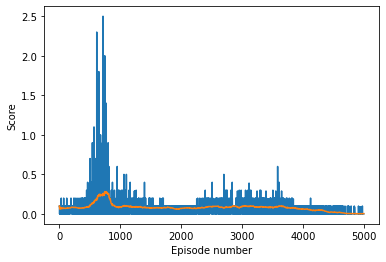

In [17]:

showGraph(episodes_score,avg_score)

## HISTORY ALL TRIAL AND ERROR - Actual Re-Inforcement Principle 

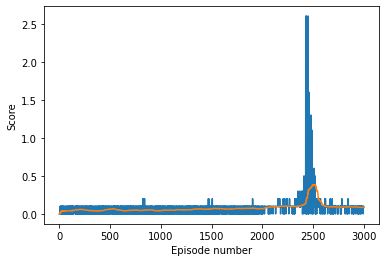

In [66]:
showGraph(episodes_score,avg_score)

In [70]:
#tune 
for agent in colabAI.multiagent:
    print("Gamma:{} , exploreFactor:{},LrAct :{},LrCritic:{},Tau:{},Sigma:{},Theta:{}".format(getattr(agent,"gamma"),getattr(agent,"explorfactor"),getattr(agent,"lrActor"),getattr(agent,"lrCritic"),getattr(agent,"tau"),getattr(agent,"sigma"),getattr(agent,"theta")))  

Gamma:0.998789 , exploreFactor:0.13,LrAct :0.0005,LrCritic:0.001,Tau:0.0012,Sigma:0.29,Theta:0.193
Gamma:0.998789 , exploreFactor:0.13,LrAct :0.0005,LrCritic:0.001,Tau:0.0012,Sigma:0.29,Theta:0.193


Episode: 10 Score: 0.09000000171363354  AvgScore (100+): 0.0869000014103949 CurrentWindowMax: 0.10000000149011612 

Episode: 20 Score: 0.09000000171363354  AvgScore (100+): 0.0869000014103949 CurrentWindowMax: 0.10000000149011612 

Episode: 30 Score: 0.09000000171363354  AvgScore (100+): 0.08670000141486525 CurrentWindowMax: 0.10000000149011612 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.0865000014193356 CurrentWindowMax: 0.10000000149011612 

Episode: 50 Score: 0.09000000171363354  AvgScore (100+): 0.08930000146850943 CurrentWindowMax: 0.10000000149011612 

Episode: 60 Score: 0.10000000149011612  AvgScore (100+): 0.08850000144913793 CurrentWindowMax: 0.10000000149011612 

Episode: 70 Score: 0.10000000149011612  AvgScore (100+): 0.08960000146180391 CurrentWindowMax: 0.10000000149011612 

Episode: 80 Score: 0.0  AvgScore (100+): 0.08950000146403908 CurrentWindowMax: 0.10000000149011612 

Episode: 90 Score: 0.09000000171363354  AvgScore (100+): 0.08900000147521496 Curren

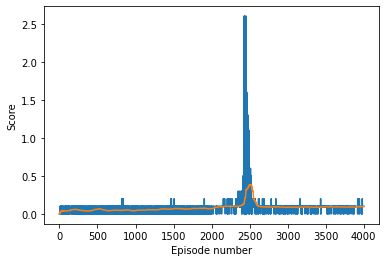

In [67]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

Episode: 10 Score: 0.10000000149011612  AvgScore (100+): 0.09770000146701932 CurrentWindowMax: 0.20000000298023224 

Episode: 20 Score: 0.10000000149011612  AvgScore (100+): 0.09970000149682164 CurrentWindowMax: 0.20000000298023224 

Episode: 30 Score: 0.10000000149011612  AvgScore (100+): 0.09980000149458647 CurrentWindowMax: 0.20000000298023224 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.10290000153705478 CurrentWindowMax: 0.20000000298023224 

Episode: 50 Score: 0.10000000149011612  AvgScore (100+): 0.10290000153705478 CurrentWindowMax: 0.20000000298023224 

Episode: 60 Score: 0.10000000149011612  AvgScore (100+): 0.10290000153705478 CurrentWindowMax: 0.20000000298023224 

Episode: 70 Score: 0.10000000149011612  AvgScore (100+): 0.10390000155195595 CurrentWindowMax: 0.20000000298023224 

Episode: 80 Score: 0.10000000149011612  AvgScore (100+): 0.10480000156909228 CurrentWindowMax: 0.20000000298023224 

Episode: 90 Score: 0.0  AvgScore (100+): 0.10380000155419111 Cur

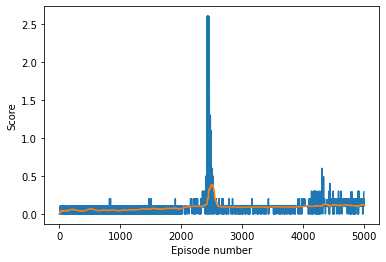

In [68]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

In [72]:
for agent in colabAI.multiagent:
    setattr(agent,"explorfactor",0.78)
    #setattr(agent,"lrActor", 0.0000000015)
    #setattr(agent,"lrCritic",0.00000002)

#tune 
for agent in colabAI.multiagent:
    print("Gamma:{} , exploreFactor:{},LrAct :{},LrCritic:{},Tau:{},Sigma:{},Theta:{}".format(getattr(agent,"gamma"),getattr(agent,"explorfactor"),getattr(agent,"lrActor"),getattr(agent,"lrCritic"),getattr(agent,"tau"),getattr(agent,"sigma"),getattr(agent,"theta")))  

Gamma:0.998789 , exploreFactor:0.78,LrAct :0.0005,LrCritic:0.001,Tau:0.0012,Sigma:0.29,Theta:0.193
Gamma:0.998789 , exploreFactor:0.78,LrAct :0.0005,LrCritic:0.001,Tau:0.0012,Sigma:0.29,Theta:0.193


Episode: 10 Score: 0.10000000149011612  AvgScore (100+): 0.059200000911951066 CurrentWindowMax: 0.2900000046938658 

Episode: 20 Score: 0.10000000149011612  AvgScore (100+): 0.060400000922381875 CurrentWindowMax: 0.2900000046938658 

Episode: 30 Score: 0.10000000149011612  AvgScore (100+): 0.06160000093281269 CurrentWindowMax: 0.2900000046938658 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.06350000096485019 CurrentWindowMax: 0.2900000046938658 

Episode: 50 Score: 0.10000000149011612  AvgScore (100+): 0.06230000095441937 CurrentWindowMax: 0.2900000046938658 

Episode: 60 Score: 0.10000000149011612  AvgScore (100+): 0.06030000092461705 CurrentWindowMax: 0.2900000046938658 

Episode: 70 Score: 0.0  AvgScore (100+): 0.05830000089481473 CurrentWindowMax: 0.2900000046938658 

Episode: 80 Score: 0.0  AvgScore (100+): 0.06020000094547868 CurrentWindowMax: 0.2900000046938658 

Episode: 90 Score: 0.10000000149011612  AvgScore (100+): 0.06010000094771385 CurrentWindowMax: 0.20000

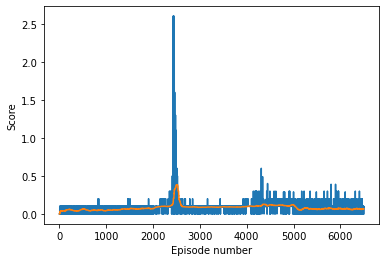

In [75]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=1000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

In [76]:
for agent in colabAI.multiagent:
    setattr(agent,"lrActor",0.0005)
    setattr(agent,"lrCritic",0.001)
    setattr(agent,"tau",0.0012)
    setattr(agent,"explorfactor",0.23)


 0.20000000298023224 

Episode: 1440 Score: 0.0  AvgScore (100+): 0.09680000144988299 CurrentWindowMax: 0.20000000298023224 

Episode: 1450 Score: 0.10000000149011612  AvgScore (100+): 0.09480000142008066 CurrentWindowMax: 0.20000000298023224 

Episode: 1460 Score: 0.10000000149011612  AvgScore (100+): 0.09680000144988299 CurrentWindowMax: 0.20000000298023224 

Episode: 1470 Score: 0.0  AvgScore (100+): 0.09480000142008066 CurrentWindowMax: 0.20000000298023224 

Episode: 1480 Score: 0.10000000149011612  AvgScore (100+): 0.09480000142008066 CurrentWindowMax: 0.20000000298023224 

Episode: 1490 Score: 0.10000000149011612  AvgScore (100+): 0.09580000143498182 CurrentWindowMax: 0.20000000298023224 

Episode: 1500 Score: 0.10000000149011612  AvgScore (100+): 0.09480000142008066 CurrentWindowMax: 0.20000000298023224 

Episode :1500 score : 0.10000000149011612 	 Avg Score(100+): 0.09480000142008066  WinMax 0.20000000298023224 
 
Episode: 1510 Score: 0.10000000149011612  AvgScore (100+): 0.094

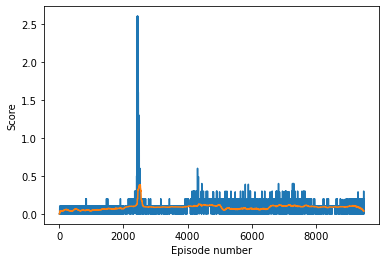

In [77]:
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=3000)
save_model_weights(colabAI)
showGraph(episodes_score,avg_score)

In [27]:
for agent in colabAI.multiagent:
    #setattr(agent,"explorfactor",0.0032)
    setattr(agent,"sigma",0.24)
    setattr(agent,"lrActor", 0.0000000015)
    setattr(agent,"lrCritic",0.00000002)

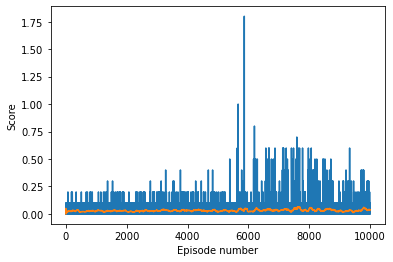

In [20]:
#Gamma:0.99896 , exploreFactor:0.00327,LrAct :7.5e-08,LrCritic:2e-07,Tau:0.00013,Sigma:0.279,Theta:0.19
showGraph(episodes_score,avg_score)

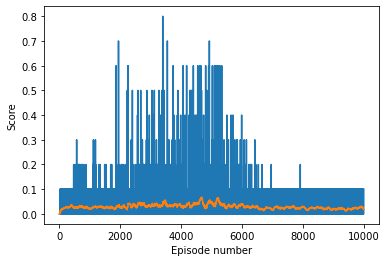

In [19]:

#Gamma:0.99896 , exploreFactor:0.00327,LrAct :7.5e-08,LrCritic:2e-07,Tau:0.00013,Sigma:0.279,Theta:0.19
showGraph(episodes_score,avg_score)

In [ ]:
showGraph(episodes_score,avg_score)

## Memory Refresh 
****

In [20]:
replayMemory_bkup5k=replayMemory
print ("Local Memory {}, BackupMemory {} , Highreward {}".format(len(replayMemory),len(replayMemory_bkup5k),len(replayHighMemoryRewards)))



Local Memory 55536, BackupMemory 55536 , Highreward 5414


In [21]:
replayHighMemoryRewards_bkup_2point5=replayHighMemoryRewards

In [22]:
setattr(colabAI,"commonMemory",replayHighMemoryRewards)
print("Refreshed memory length",len(colabAI.commonMemory))

Refreshed memory length 5414


In [81]:
#Training Tennis Agents
#Memory refreshed
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=500)
save_model_weights(colabAI)


Episode: 10 Score: 0.0  AvgScore (100+): 0.041100000645965334 CurrentWindowMax: 0.30000000447034836 

Episode: 20 Score: 0.0  AvgScore (100+): 0.03920000061392784 CurrentWindowMax: 0.30000000447034836 

Episode: 30 Score: 0.0  AvgScore (100+): 0.03750000057742 CurrentWindowMax: 0.30000000447034836 

Episode: 40 Score: 0.10000000149011612  AvgScore (100+): 0.03660000056028366 CurrentWindowMax: 0.30000000447034836 

Episode: 50 Score: 0.0  AvgScore (100+): 0.03660000056028366 CurrentWindowMax: 0.4000000059604645 

Episode: 60 Score: 0.0  AvgScore (100+): 0.03660000056028366 CurrentWindowMax: 0.4000000059604645 

Episode: 70 Score: 0.0  AvgScore (100+): 0.03960000060498715 CurrentWindowMax: 0.4000000059604645 

Episode: 80 Score: 0.10000000149011612  AvgScore (100+): 0.040800000615417956 CurrentWindowMax: 0.4000000059604645 

Episode: 90 Score: 0.0  AvgScore (100+): 0.04280000064522028 CurrentWindowMax: 0.4000000059604645 

Episode: 100 Score: 0.0  AvgScore (100+): 0.041700000632554295 Cu

KeyboardInterrupt: 

In [ ]:
#Gamma:0.99896 , exploreFactor:0.00327,LrAct :7.5e-08,LrCritic:2e-07,Tau:0.00013,Sigma:0.279,Theta:0.19
showGraph(episodes_score,avg_score)


In [47]:
#Learning at (np.any(done)) during train
#High rewards memory condition updated from 0.19 to 0.39 
#Training Tennis Agents
#Memory refreshed
trainMultiAgents(env,colabAI,episodes_score,scores_window,avg_score,n_episodes=5000)
save_model_weights(colabAI)


Episode: 10 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 20 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 30 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 40 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 50 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 60 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 70 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 80 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 90 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWindowMax: 0.09000000171363354 

Episode: 100 Score: 0.0  AvgScore (100+): 0.0009000000171363354 CurrentWi

KeyboardInterrupt: 

In [ ]:
#Gamma:0.9986 , exploreFactor:0.003,LrAct :5.5e-05,LrCritic:3e-05,Tau:0.0013,Sigma:0.369,Theta:0.39
#Memory refereshed 
#Learning at every step
#Highreward experience saved condigtion updated from 0.19 to 0.39 - Train Function
showGraph(episodes_score,avg_score)

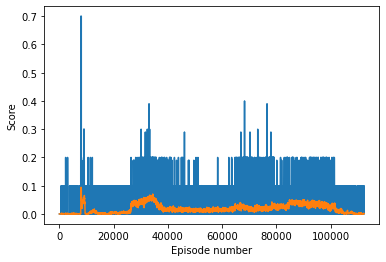

In [80]:
#HP :
#[8] just 0.1 so reset to default [1]
#[7] Reset to [5]
#[6] setattr(colabAI,"explorfactor",0.39) setattr(colabAI,"lrActor",0.0001)setattr(colabAI,"lrCritic",0.0001)
#[5] setattr(colabAI,"explorfactor",0.09) setattr(colabAI,"lrActor",0.000117)setattr(colabAI,"lrCritic",0.000117)
#[4] Gamma : 99782011
# [3] Gamma :9782011
# [2]setattr(colabAI,"explorfactor",1.0)(colabAI,"sigma",0.24)setattr(colabAI,"lrActor",0.0001)setattr(colabAI,"lrCritic",0.0001)
# [1]Seed 1,Gamma :0.997999 , TAU:0.0013, LR_Act :0.00013 , LR_Critic 0.0001 , Mu 0.0, Theta 0.17, Sigma 0.6, ExploreFactor 0.95, IsTargetHardcopyFalse
#Memory refreshed
showGraph(episodes_score,avg_score)

In [ ]:
episodes_score5=episodes_score

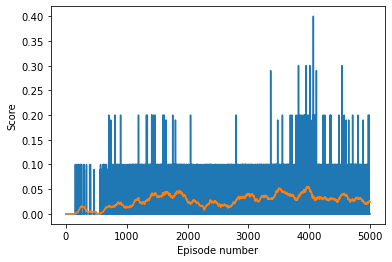

In [18]:
#Hyper param -Gamma :0.768 , LR_Act :0.0001 , LR_Critic 0.0002 , Theta 0.17, Sigma 0.24
#2nd run without restart kernal but 3K Episodes
showGraph(episodes_score,avg_score)

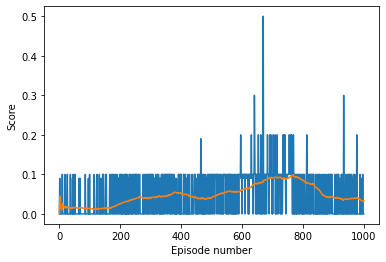

In [13]:
#Hyper param - Gamma :0.987 , LR_Act :0.0001 , LR_Critic 0.0002 , Theta 0.17, Sigma 0.24
#2nd run without restart kernal
showGraph(episodes_score,avg_score)

In [23]:
#Save weights
print('\rMax Score achieved in all episodes {} : {} '.format(i_episode,np.max(episodes_score) ) )
torch.save(colabAI.actor_local.state_dict(), 'checkpoint_actor_point_base7.pth')
torch.save(colabAI.critic_local.state_dict(), 'checkpoint_critic_point_base7.pth')
torch.save(colabAI.actor_target.state_dict(), 'checkpoint_actor_target_base7.pth')        
torch.save(colabAI.critic_target.state_dict(), 'checkpoint_critic_target_base7.pth')

Max Score achieved in all episodes 10000 : 0.7000000104308128 


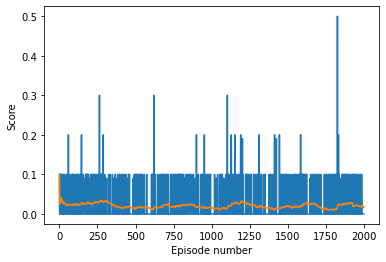

In [24]:
#Zoom above plots to custom range
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
cus_score=episodes_score[0:2000]
plt.plot(np.arange(2000), cus_score)
plt.plot(np.arange(2000), avg_score[0:2000])
plt.xlabel('Episode number')
plt.ylabel('Score')

plt.show()

In [44]:
env.close()

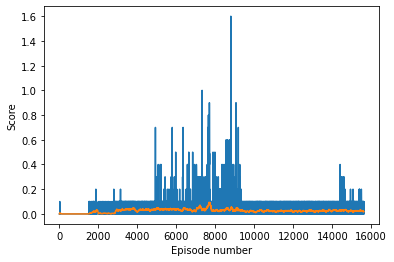

In [33]:
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(episodes_score)), episodes_score)
plt.plot(np.arange(len(avg_score)), avg_score)
plt.plot(np.arange(len(scores)), target_score*np.ones(len(scores)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()

## WHEN TRIED FIRST TIME 
*****

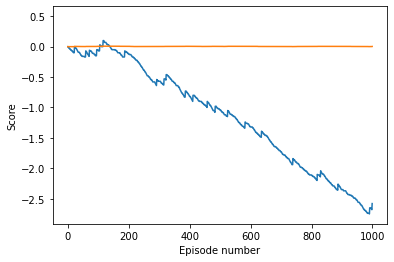

In [62]:
target_score =0.5
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(rewards_plot)), rewards_plot)
plt.plot(np.arange(len(avg_score)), avg_score)
plt.plot(np.arange(len(scores)), target_score*np.ones(len(scores)))
plt.xlabel('Episode number')
plt.ylabel('Score')
#plt.savefig('graph_trained_{:d}_episodes'.format(len(scores)), format='png')
plt.show()